In [4]:
using Plots
using LaTeXStrings
pyplot(size=(300,200))

Plots.PyPlotBackend()

## Brownian Motion
Here is a simple example of Brownian motion. It's actually codified in the "Plots.jl" package as their fakedata function!

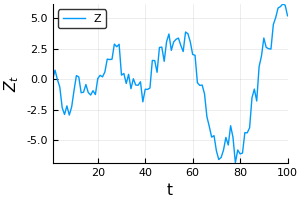

In [10]:
pyplot(size=(300,200))
srand(2)
plot(Plots.fakedata(100,1), label="Z")
xlabel!("t")
ylabel!(L"Z_t")

In [11]:
savefig("brownian-motion.pdf")

### Animated Brownian motion!

In [31]:
pyplot(size=(300,200))
srand(2)
z = Plots.fakedata(100,1)
p = plot(1:20, z[1:20], label="Z", legend=:topleft)
xlabel!("t")
ylabel!(L"Z_t")
ylims!(-6,6)
anim = Animation()
for i=21:length(z)
    p[1] = 1:i, z[1:i]
    frame(anim)
end
gif(anim, "brownian-motion.gif", fps=10)

INFO: Saved animation to /Users/dgleich/Dropbox/publications/tensor-tutorial/tesp-mini/tesp-minitutorial/brownian-motion.gif


Plots.AnimatedGif("/Users/dgleich/Dropbox/publications/tensor-tutorial/tesp-mini/tesp-minitutorial/brownian-motion.gif")

## Polya Urn

In [42]:
n = 100
z = zeros(n)
Z = 1
srand(1)
for i=1:n
    Z += rand() < Z/(i+1)
    z[i] = Z
end

p = plot(1:20, z[1:20]./((1:20)+1), label="Z", legend=:topleft)
xlabel!("t")
ylabel!(L"Z_t/(t+2)")
ylims!(0,1)
anim = Animation()
for i=21:length(z)
    p[1] = 1:i, z[1:i]./((1:i)+2)
    frame(anim)
end
gif(anim, "polya-urn.gif", fps=10)

INFO: Saved animation to /Users/dgleich/Dropbox/publications/tensor-tutorial/tesp-mini/tesp-minitutorial/polya-urn.gif


Plots.AnimatedGif("/Users/dgleich/Dropbox/publications/tensor-tutorial/tesp-mini/tesp-minitutorial/polya-urn.gif")

### Look at the distribution of trajectories for Polya Urns

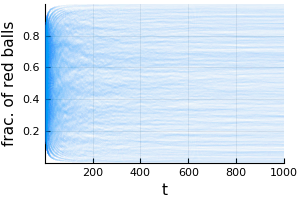

In [17]:
srand(1)
function polya(n)
    z = Vector{Float64}(n)
    Z = 1
    for i=1:n
        Z += rand() < Z/(i+1)
        z[i] = Z
    end
    return z
end
k = 1000
n = 1000
p = plot()
lasts = zeros(k)
for j=1:k
    z = polya(n)
    lasts[j] = z[end]
    plot!(z./((1:n)+2), alpha=15.0/k, label="", color=1)
end
xlabel!("t")
ylabel!("frac. of red balls")
p

In [18]:
savefig("polya-trajectories.pdf")

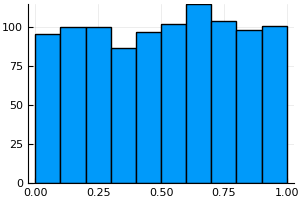

In [20]:
histogram(lasts/(n+2), label="", nbins=15)

In [21]:
savefig("polya-distribution.pdf")

In [9]:
?histogram

search: histogram histogram! histogram2d histogram2d!



No documentation found.

`Plots.histogram` is a `Function`.

```
# 1 method for generic function "histogram":
histogram(args...; kw...) in Plots at /Users/dgleich/.julia/v0.6/RecipesBase/src/RecipesBase.jl:381
```
